In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_excel(r'C:\Users\USER\Downloads\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Checking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
# some basic informations
data.shape

(150, 5)

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Handiling missing values

In [10]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
# correlation

In [13]:
corrmatrix=data.corr()

<AxesSubplot:>

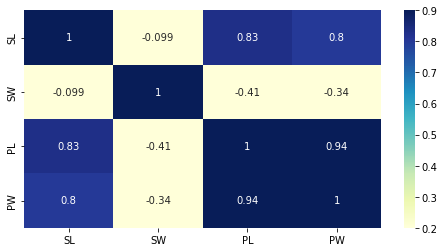

In [14]:
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix, vmin=0.2, vmax=0.9, annot=True, cmap='YlGnBu')

# spliting the data into testing and training dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(data, test_size = 0.25)

In [17]:
x_train = train[['SL', 'SW', 'PL','PW']]
                 
y_train = train.Classification

x_test = test[['SL', 'SW', 'PL','PW']]

y_test = test.Classification

# 1.Logististic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logit_model = LogisticRegression()

logit_model = logit_model.fit(x_train, y_train)

y_logit_pred = logit_model.predict(x_test)



C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
y_logit_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [21]:
# Evaluation of the model using confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [23]:
confusion_matrix(y_test, y_logit_pred)

array([[13,  0,  0],
       [ 1, 10,  1],
       [ 0,  2, 11]], dtype=int64)

In [50]:
print('Accuracy of logistic model:',accuracy_score(y_logit_pred,y_test))

Accuracy of logistic model: 0.8947368421052632


# 2.Using KNN Neighbors

In [51]:


from sklearn.neighbors import KNeighborsClassifier

kNN_model = KNeighborsClassifier(n_neighbors=5)

kNN_model = kNN_model.fit(x_train,y_train)

y_kNN_pred = kNN_model.predict(x_test)

from sklearn.metrics import accuracy_score

print("Accuracy of kNN model:",accuracy_score(y_test,y_kNN_pred))

Accuracy of kNN model: 0.9473684210526315


In [58]:
 #accuracy of kNN model for different n values

In [59]:
metric_k = []
neighbors = range(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(x_train,y_train)
    y_pred_kNN = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

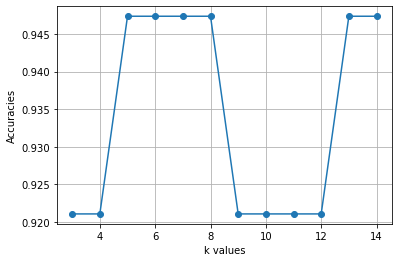

In [57]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

# 3.  Support Vector Machine(SVM)

In [27]:
# a. Linear Kernal

In [28]:
from sklearn.svm import SVC

In [30]:
svm_model1 =SVC(kernel ='linear')

svm_model1 = svm_model1.fit(x_train,y_train)

y_svm_pred1 = svm_model1.predict(x_test)


In [52]:
print("Accuracy of SVM linear kernal model:",accuracy_score(y_test,y_svm_pred1))

Accuracy of SVM linear kernal model: 0.9210526315789473


In [33]:
confusion_matrix(y_test,y_svm_pred1)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 11]], dtype=int64)

In [34]:
# b. RBF kernal

In [36]:
svm_model2 =SVC(kernel ='rbf')

svm_model2 = svm_model2.fit(x_train,y_train)

y_svm_pred2 = svm_model2.predict(x_test)


In [53]:
print("Accuracy of SVM rbf kernal model:",accuracy_score(y_test,y_svm_pred2))

Accuracy of SVM rbf kernal model: 0.9736842105263158


In [41]:
confusion_matrix(y_test,y_svm_pred2)

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 12]], dtype=int64)

# 4. Decision Tree

In [38]:
from sklearn.tree  import DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier()
dt_model =dt_model.fit(x_train, y_train)
y_dt_pred =dt_model.predict(x_test)

In [54]:
print("Accuracy of decision tree:",accuracy_score(y_test,y_df_pred))

Accuracy of decision tree: 0.8947368421052632


In [45]:
confusion_matrix(y_test,y_dt_pred)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  3, 10]], dtype=int64)

# 5. Random Forest Algorithm 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = RandomForestClassifier()
rf_modeel = rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)

In [55]:
print("Accuracy of Random Forest Algorithm:",accuracy_score(y_test,y_rf_pred))

Accuracy of Random Forest Algorithm: 0.8947368421052632


In [49]:
confusion_matrix(y_test,y_rf_pred)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  3, 10]], dtype=int64)

In [71]:
 Accuracy = [['Logistic',0.8947368421052632],['kNN', 0.9473684210526315],['SVM linear', 0.9210526315789473],['SVM RBF',0.9736842105263158],['Decision Tree',0.8947368421052632],['Random Forest', 0.8947368421052632]]

In [73]:
df = pd.DataFrame(Accuracy, columns=['Model','Accurqacy'])


In [74]:
df

,Model,Accurqacy
0,Logistic,0.894737
1,kNN,0.947368
2,SVM linear,0.921053
3,SVM RBF,0.973684
4,Decision Tree,0.894737
5,Random Forest,0.894737


# SVM model with RBF kernal  has highest accuracy.